<div style="background-color: lightblue; padding: 60px;">
    <h1><b>Discrete Probabilistic Methods</b></h1>
</div>


Anomaly Detection: Identification of items, events or observations which is significantly different from the remaining data.

What is it?
Focusing on how to identify anomalies in our discrete variables

Why do we care?
Allows us to find items, events, or observations which are significantly different from the remaining data and determine whether or not they belong

How do we do it?
count: the number of times each unique value appears in the dataset
frequencies: the number of times each unique value appears in the dataset as a percentage of the total
conditional probability: the likelihood of an event or outcome occurring, based on the occurrence of a previous event or outcome


Examples of Anomaly Detection- Discrete Probabilistic Methods:

count: How many times we see an ip address in the dataset
frequency: What is probability of ip address showing up in the dataset
conditional probability: Given an ip address, what is prob of a particular status (e.g authentication failure)
Frequency or counting based

How many time a value of variable (e.g. ip address) shows up
More frequent - less likely to be an anomaly
Less frequent - more likely to be an anomaly
Calculate probability
Conditional probability
 


## Scenario

Use Codeup's access logs to determine if anyone is accessing the curriculum when they shouldn't be. This data is from codeup's first data science cohort, Ada. Each row is one request to the server.

In [118]:
# Let's grab some data:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

#math imports
import math
from sklearn import metrics

#from sklearn import metrics
import env


#remove warnings
import warnings
warnings.filterwarnings("ignore")

## Wrangle

The data comes from the webserver logs of the API that we used in the timeseries module. Each row is one request to the server



## Acquire

In [119]:
#create SQL connection to logs
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/logs'

#SQL query
query = 'SELECT * FROM api_access'

In [120]:
#read in the df
df = pd.read_sql(query, url)

In [121]:
#take a look at the data
df.sample(5)

,entry
13095,"72.181.113.170 - - [17/Apr/2019:03:42:30 +0000] ""GET /api/v1/sales?page=126 HTTP/1.1"" ..."
4682,"97.105.19.58 - - [16/Apr/2019:20:37:08 +0000] ""GET /api/v1/sales?page=8 HTTP/1.1"" 200 ..."
905,"97.105.19.58 - - [16/Apr/2019:19:47:43 +0000] ""GET /api/v1/sales?page=119 HTTP/1.1"" 20..."
13826,"173.173.113.51 - - [17/Apr/2019:05:17:25 +0000] ""GET /api/v1/sales?page=128 HTTP/1.1"" ..."
5276,"97.105.19.58 - - [16/Apr/2019:20:42:55 +0000] ""GET /api/v1/sales?page=96 HTTP/1.1"" 200..."


In [122]:
#how many columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13974 entries, 0 to 13973
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   entry   13974 non-null  object
dtypes: object(1)
memory usage: 109.3+ KB


Takeaway:
It looks like we have one column that contains the 'entry' which holds different elements within it.
In our preparation steps we will look at what 'entry' holds.We have one column that we will need to parse into multiple elements in separate columns.
We have 13,974 entries.

## Parse

In [ ]:
Turn the entry column into separate elements with separate columns

In [123]:
#function to deal with parsing one entry in our log data
#this function works on one string
def parse_log_entry(entry):
    parts = entry.split()
    output = {}
    output['ip'] = parts[0]
    output['timestamp'] = parts[3][1:].replace(':', ' ', 1)
    output['request_method'] = parts[5][1:]
    output['request_path'] = parts[6]
    output['http_version'] = parts[7][:-1]
    output['status_code'] = parts[8]
    output['size'] = int(parts[9])
    output['user_agent'] =parts[11].strip('"')
    return pd.Series(output)

In [124]:
#apply string function to every element in a series
df = df.entry.apply(parse_log_entry)

In [125]:
#take a look at our dataframe with 
df

,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent
0,97.105.19.58,16/Apr/2019 19:34:42,GET,/api/v1/sales?page=81,HTTP/1.1,200,512495,python-requests/2.21.0
1,97.105.19.58,16/Apr/2019 19:34:42,GET,/api/v1/items,HTTP/1.1,200,3561,python-requests/2.21.0
2,97.105.19.58,16/Apr/2019 19:34:44,GET,/api/v1/sales?page=82,HTTP/1.1,200,510103,python-requests/2.21.0
3,97.105.19.58,16/Apr/2019 19:34:46,GET,/api/v1/sales?page=83,HTTP/1.1,200,510003,python-requests/2.21.0
4,97.105.19.58,16/Apr/2019 19:34:48,GET,/api/v1/sales?page=84,HTTP/1.1,200,511963,python-requests/2.21.0
...,...,...,...,...,...,...,...,...
13969,97.105.19.58,17/Apr/2019 12:55:12,GET,/api/v1/sales?page=62,HTTP/1.1,200,511544,python-requests/2.21.0
13970,97.105.19.58,17/Apr/2019 12:55:12,GET,/api/v1/sales?page=65,HTTP/1.1,200,511201,python-requests/2.21.0
13971,97.105.19.58,17/Apr/2019 12:55:13,GET,/api/v1/sales?page=73,HTTP/1.1,200,511781,python-requests/2.21.0
13972,97.105.19.58,17/Apr/2019 12:55:13,GET,/api/v1/sales?page=69,HTTP/1.1,200,510136,python-requests/2.21.0


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13974 entries, 0 to 13973
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ip              13974 non-null  object
 1   timestamp       13974 non-null  object
 2   request_method  13974 non-null  object
 3   request_path    13974 non-null  object
 4   http_version    13974 non-null  object
 5   status_code     13974 non-null  object
 6   size            13974 non-null  int64 
 7   user_agent      13974 non-null  object
dtypes: int64(1), object(7)
memory usage: 873.5+ KB


In [127]:
df.head()

,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent
0,97.105.19.58,16/Apr/2019 19:34:42,GET,/api/v1/sales?page=81,HTTP/1.1,200,512495,python-requests/2.21.0
1,97.105.19.58,16/Apr/2019 19:34:42,GET,/api/v1/items,HTTP/1.1,200,3561,python-requests/2.21.0
2,97.105.19.58,16/Apr/2019 19:34:44,GET,/api/v1/sales?page=82,HTTP/1.1,200,510103,python-requests/2.21.0
3,97.105.19.58,16/Apr/2019 19:34:46,GET,/api/v1/sales?page=83,HTTP/1.1,200,510003,python-requests/2.21.0
4,97.105.19.58,16/Apr/2019 19:34:48,GET,/api/v1/sales?page=84,HTTP/1.1,200,511963,python-requests/2.21.0


We now have 8 columns containing each element that was in the original 'entry' column.


## Add Anomalies

In [ ]:
We will add four anomalous entries to our dataframe

In [128]:
#create DataFrame with anomalies in it
new = pd.DataFrame([
    ["95.31.18.119", "21/Apr/2019 10:02:41", "GET", "/api/v1/items/", "HTTP/1.1", 
     '200', 1153005, "python-requests/2.21.0"],
    ["95.31.16.121", "17/Apr/2019 19:36:41", "GET", "/api/v1/sales?page=79/", "HTTP/1.1", 
     '301', 1005, "python-requests/2.21.0"],
    ["97.105.15.120", "18/Apr/2019 19:42:41", "GET", "/api/v1/sales?page=79/", "HTTP/1.1", 
     '301', 2560, "python-requests/2.21.0"],
    ["97.105.19.58", "19/Apr/2019 19:42:41", "GET", "/api/v1/sales?page=79/", "HTTP/1.1", 
     '200', 2056327, "python-requests/2.21.0"],
], columns=df.columns)

#join the original dataframe and anomalous dataframes together
df = pd.concat([df,new])

In [192]:
#create the column for megabite size
#divide by 1024 twice
df['size_mb'] = df['size'] / 1024 / 1024

In [193]:
#take a look at the data
df.sample(5)

,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent,size_mb
11804,97.105.19.58,16/Apr/2019 22:54:25,GET,/api/v1/sales?page=43,HTTP/1.1,200,510448,python-requests/2.21.0,0.486801
4237,97.105.19.58,16/Apr/2019 20:28:42,GET,/api/v1/sales?page=2,HTTP/1.1,200,494819,python-requests/2.21.0,0.471896
8566,97.105.19.58,16/Apr/2019 21:36:31,GET,/api/v1/sales?page=3,HTTP/1.1,200,499787,python-requests/2.21.0,0.476634
13149,173.173.113.51,17/Apr/2019 03:45:04,GET,/api/v1/sales?page=94,HTTP/1.1,200,510138,python-requests/2.21.0,0.486506
11736,97.105.19.58,16/Apr/2019 22:51:37,GET,/api/v1/sales?page=158,HTTP/1.1,200,510316,python-requests/2.21.0,0.486675


In [194]:
#take a look at our observations
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13978 entries, 0 to 3
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ip              13978 non-null  object 
 1   timestamp       13978 non-null  object 
 2   request_method  13978 non-null  object 
 3   request_path    13978 non-null  object 
 4   http_version    13978 non-null  object 
 5   status_code     13978 non-null  object 
 6   size            13978 non-null  int64  
 7   user_agent      13978 non-null  object 
 8   size_mb         13978 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.1+ MB


In [ ]:
Takeaway:
We now have four additional observations
All of our data from the 'entry' column has been parsed


# Detecting Anomalies in Discrete Variables

## request_path

In [145]:
#get counts for each request path
df.request_path.value_counts(dropna=False)

request_path
/api/v1/sales?page=2               709
/api/v1/items                      464
/api/v1/items?page=2               291
/api/v1/items?page=3               219
/api/v1/stores                     162
                                  ... 
/api/v1                              1
/api/v1//api/v1/items/next_page      1
/api/v1//api/v1/items                1
/api/v1/items?page=0                 1
/api/V1/HiZach!                      1
Name: count, Length: 220, dtype: int64

In [146]:
#check how many unique request_path we have
df.request_path.nunique()

220

In [155]:
#create a new df with values of each unique request method
request_path_df = pd.DataFrame(df.request_path.value_counts(dropna=False)).reset_index().\
                rename(columns ={'index': 'request_path', 'count': 'path_count'})

In [156]:
#take a look at the new df
request_path_df.head()

,request_path,path_count
0,/api/v1/sales?page=2,709
1,/api/v1/items,464
2,/api/v1/items?page=2,291
3,/api/v1/items?page=3,219
4,/api/v1/stores,162


In [149]:
#percentage count of request path
df.request_path.value_counts(normalize=True)

request_path
/api/v1/sales?page=2               0.050723
/api/v1/items                      0.033195
/api/v1/items?page=2               0.020818
/api/v1/items?page=3               0.015667
/api/v1/stores                     0.011590
                                     ...   
/api/v1                            0.000072
/api/v1//api/v1/items/next_page    0.000072
/api/v1//api/v1/items              0.000072
/api/v1/items?page=0               0.000072
/api/V1/HiZach!                    0.000072
Name: proportion, Length: 220, dtype: float64

In [150]:
#calculate probabity for each request method
#create a new df with values of each unique request method
#save the percent to a df
request_path_df2 = df.request_path.value_counts(normalize=True).reset_index().rename(columns={'index':'request_path','proportion':'path_proba'})


In [151]:
#take a look at the probability of each method
request_path_df2.head()

,request_path,path_proba
0,/api/v1/sales?page=2,0.050723
1,/api/v1/items,0.033195
2,/api/v1/items?page=2,0.020818
3,/api/v1/items?page=3,0.015667
4,/api/v1/stores,0.011590


In [157]:
# merge the two data frames create above into a path_df2)
request_path_df = pd.merge(request_path_df, request_path_df2, how='inner', on='request_path')
request_path_df.head()

,request_path,path_count,path_proba
0,/api/v1/sales?page=2,709,0.050723
1,/api/v1/items,464,0.033195
2,/api/v1/items?page=2,291,0.020818
3,/api/v1/items?page=3,219,0.015667
4,/api/v1/stores,162,0.011590


In [159]:
#look at rows where path_proba is less than 1%
request_path_df[request_path_df2.path_proba < 0.01]

,request_path,path_count,path_proba
6,/,107,0.007655
7,/documentation,100,0.007154
8,/api/v1/sales?page=3,91,0.006510
9,/api/v1/items?page=1,88,0.006296
10,/api/v1/sales?page=5,83,0.005938
...,...,...,...
215,/api/v1,1,0.000072
216,/api/v1//api/v1/items/next_page,1,0.000072
217,/api/v1//api/v1/items,1,0.000072
218,/api/v1/items?page=0,1,0.000072


In [160]:
#look at rows where method_proba is more than 1%
request_path_df[request_path_df2.path_proba > 0.01]

,request_path,path_count,path_proba
0,/api/v1/sales?page=2,709,0.050723
1,/api/v1/items,464,0.033195
2,/api/v1/items?page=2,291,0.020818
3,/api/v1/items?page=3,219,0.015667
4,/api/v1/stores,162,0.011590
5,/api/v1/sales,152,0.010874


# request_method

In [161]:
df.request_method.value_counts(dropna=False)


request_method
GET    13978
Name: count, dtype: int64

In [162]:
df.request_method.value_counts(normalize=True)


request_method
GET    1.0
Name: proportion, dtype: float64

In [ ]:
Takeaway:
We do not appear to have any anomalies within request_method.
100% of the observations are GET method

# http_version

In [163]:
df.http_version.value_counts(dropna=False)

http_version
HTTP/1.1    13978
Name: count, dtype: int64

In [164]:
df.http_version.value_counts(normalize=True)


http_version
HTTP/1.1    1.0
Name: proportion, dtype: float64

Takeaway:
We do not appear to have any anomalies within http_version.
100% of the observations are HTTP/1.1


# status_code

In [170]:
df.status_code.value_counts(dropna=False)


status_code
200    13960
499       16
301        2
Name: count, dtype: int64

In [171]:
df.status_code.value_counts(normalize=True)


status_code
200    0.998712
499    0.001145
301    0.000143
Name: proportion, dtype: float64

In [172]:
status_df1 = df.status_code.value_counts(normalize=True).reset_index().rename(columns={'index':'status_code','proportion':'percent'})
status_df1.head()

,status_code,percent
0,200,0.998712
1,499,0.001145
2,301,0.000143


In [176]:
#status_df2 = df.status_code.value_counts().reset_index().rename(columns={'index':'status_code','status_code':'count'})

status_df2 = df.status_code.value_counts().reset_index().rename(columns={'index':'status_code','count':'count'})
status_df2.head()

,status_code,count
0,200,13960
1,499,16
2,301,2


In [177]:
status_df = pd.merge(status_df1, status_df2, on='status_code')
status_df.head()

,status_code,percent,count
0,200,0.998712,13960
1,499,0.001145,16
2,301,0.000143,2


In [ ]:
Takeaway:
99% of observations seem to be successful
0.1% are 499 errors
0.01% are 301 errors

# size_mb

In [195]:
df.columns

Index(['ip', 'timestamp', 'request_method', 'request_path', 'http_version',
       'status_code', 'size', 'user_agent', 'size_mb'],
      dtype='object')

In [196]:
df['size_mb'].value_counts(dropna=False)

size_mb
0.471896    705
0.003396    548
0.003489    291
0.001266    229
0.001704    219
           ... 
0.327981      1
0.343606      1
0.312356      1
0.265481      1
1.961066      1
Name: count, Length: 191, dtype: int64

In [197]:
df['size_mb'].value_counts(normalize=True)


size_mb
0.471896    0.050436
0.003396    0.039204
0.003489    0.020818
0.001266    0.016383
0.001704    0.015667
              ...   
0.327981    0.000072
0.343606    0.000072
0.312356    0.000072
0.265481    0.000072
1.961066    0.000072
Name: proportion, Length: 191, dtype: float64

In [199]:
df['size_mb'].nunique()


191

In [200]:
df['size_mb'].min(), df['size_mb'].max()


(0.0, 1.9610662460327148)

In [201]:
df['size_mb'].describe()


count    13978.000000
mean         0.429155
std          0.154010
min          0.000000
25%          0.477445
50%          0.486506
75%          0.487605
max          1.961066
Name: size_mb, dtype: float64

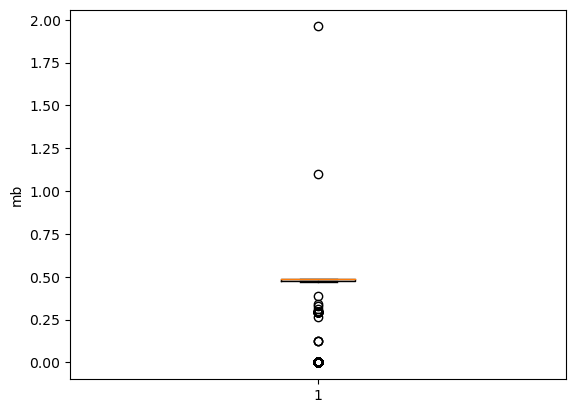

In [202]:
plt.boxplot('size_mb', data=df)
plt.ylabel('mb')
plt.show()


In [ ]:
Takeaway:
Sizes ranges from 0 to over 2M
This is something we may want to look further!

# user_agent

In [203]:
df.user_agent.value_counts(dropna=False)


user_agent
python-requests/2.21.0    12005
python-requests/2.20.1     1911
Mozilla/5.0                  48
Slackbot-LinkExpanding        7
Slackbot                      6
Python-urllib/3.7             1
Name: count, dtype: int64

In [204]:
df.user_agent.value_counts(normalize=True)


user_agent
python-requests/2.21.0    0.858850
python-requests/2.20.1    0.136715
Mozilla/5.0               0.003434
Slackbot-LinkExpanding    0.000501
Slackbot                  0.000429
Python-urllib/3.7         0.000072
Name: proportion, dtype: float64

In [205]:
#look at the mozilla anomalies
mozilla_anom = df.loc[df['user_agent'] == 'Mozilla/5.0']
mozilla_anom

,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent,size_mb
173,97.105.19.58,16/Apr/2019 19:38:16,GET,/api/V1/HiZach!,HTTP/1.1,200,162,Mozilla/5.0,0.000154
174,97.105.19.58,16/Apr/2019 19:38:16,GET,/favicon.ico,HTTP/1.1,200,162,Mozilla/5.0,0.000154
565,97.105.19.58,16/Apr/2019 19:44:04,GET,/api/v1/stores?page=0,HTTP/1.1,200,1328,Mozilla/5.0,0.001266
566,97.105.19.58,16/Apr/2019 19:44:04,GET,/favicon.ico,HTTP/1.1,200,162,Mozilla/5.0,0.000154
582,97.105.19.58,16/Apr/2019 19:44:16,GET,/api/v1/stores?page=1,HTTP/1.1,200,1328,Mozilla/5.0,0.001266
583,97.105.19.58,16/Apr/2019 19:44:16,GET,/favicon.ico,HTTP/1.1,200,162,Mozilla/5.0,0.000154
595,97.105.19.58,16/Apr/2019 19:44:24,GET,/api/v1/stores?page=1,HTTP/1.1,200,1328,Mozilla/5.0,0.001266
596,97.105.19.58,16/Apr/2019 19:44:24,GET,/favicon.ico,HTTP/1.1,200,162,Mozilla/5.0,0.000154
601,97.105.19.58,16/Apr/2019 19:44:28,GET,/api/v1/stores?page=2,HTTP/1.1,200,1328,Mozilla/5.0,0.001266
602,97.105.19.58,16/Apr/2019 19:44:28,GET,/favicon.ico,HTTP/1.1,200,162,Mozilla/5.0,0.000154


In [206]:
python_urllib_anom = df.loc[df['user_agent'] == 'Python-urllib/3.7']
python_urllib_anom  

,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent,size_mb
6693,97.105.19.58,16/Apr/2019 20:57:38,GET,/api/v1/items&page=0,HTTP/1.1,200,162,Python-urllib/3.7,0.000154


In [ ]:
Takeaway:
Almost 99.6% of the observations come from python 2.2 or newer.
Outcomes:

The anomaly from python 3.7 was actually successful and came from the most frequent ip

# timestamp

In [207]:
#take a look at the counts for each day/hour
df.timestamp.value_counts()

timestamp
16/Apr/2019 19:56:10    9
16/Apr/2019 19:49:58    8
16/Apr/2019 20:01:30    7
16/Apr/2019 20:12:23    6
16/Apr/2019 20:02:59    6
                       ..
16/Apr/2019 21:10:11    1
16/Apr/2019 21:10:09    1
16/Apr/2019 21:10:07    1
16/Apr/2019 21:10:05    1
19/Apr/2019 19:42:41    1
Name: count, Length: 9957, dtype: int64

In [208]:
#what percentages does that hold
df.timestamp.value_counts(normalize=True)

timestamp
16/Apr/2019 19:56:10    0.000644
16/Apr/2019 19:49:58    0.000572
16/Apr/2019 20:01:30    0.000501
16/Apr/2019 20:12:23    0.000429
16/Apr/2019 20:02:59    0.000429
                          ...   
16/Apr/2019 21:10:11    0.000072
16/Apr/2019 21:10:09    0.000072
16/Apr/2019 21:10:07    0.000072
16/Apr/2019 21:10:05    0.000072
19/Apr/2019 19:42:41    0.000072
Name: proportion, Length: 9957, dtype: float64

In [209]:
#how many unique timestamps do we have?
df.timestamp.nunique()

9957

In [210]:
#out of our original dataframe
df.timestamp.size

13978

In [ ]:
Takeaway:
It looks like 71% of these timestamps are different from one another
Our best option here might be looking at time series

In [211]:
#converted the 'timestamp' column to datetime and set it as the index
df.timestamp = pd.to_datetime(df.timestamp)
df.set_index("timestamp", inplace=True)

# Extract year, month, weekday, and hour into separate columns
df['year'] = df.index.year
df['month'] = df.index.month_name()
df['weekday'] = df.index.day_name()
df['hour'] = df.index.hour

In [212]:
df.head()


,ip,request_method,request_path,http_version,status_code,size,user_agent,size_mb,year,month,weekday,hour
timestamp,,,,,,,,,,,,
2019-04-16 19:34:42,97.105.19.58,GET,/api/v1/sales?page=81,HTTP/1.1,200,512495,python-requests/2.21.0,0.488753,2019,April,Tuesday,19
2019-04-16 19:34:42,97.105.19.58,GET,/api/v1/items,HTTP/1.1,200,3561,python-requests/2.21.0,0.003396,2019,April,Tuesday,19
2019-04-16 19:34:44,97.105.19.58,GET,/api/v1/sales?page=82,HTTP/1.1,200,510103,python-requests/2.21.0,0.486472,2019,April,Tuesday,19
2019-04-16 19:34:46,97.105.19.58,GET,/api/v1/sales?page=83,HTTP/1.1,200,510003,python-requests/2.21.0,0.486377,2019,April,Tuesday,19
2019-04-16 19:34:48,97.105.19.58,GET,/api/v1/sales?page=84,HTTP/1.1,200,511963,python-requests/2.21.0,0.488246,2019,April,Tuesday,19


In [213]:
#what timeframe are we dealing with?
df.index.min(), df.index.max()

(Timestamp('2019-04-16 19:34:42'), Timestamp('2019-04-21 10:02:41'))

In [214]:
#look at months
df.month.value_counts()

month
April    13978
Name: count, dtype: int64

In [ ]:
Takeaway:
All observations appear to be within a week.
-- April of 2019

In [215]:
#what time of day are these hits to the curriculum page?
df.hour.value_counts()

hour
20    4587
21    3430
19    2247
22    1684
3      807
1      380
2      284
5      253
4      209
12      70
6       15
0        8
23       2
10       2
Name: count, dtype: int64

In [ ]:
Takeaway:
85% of observations occur between 7pm and 10pm.

In [216]:
#what days of the week have the most activity?
df.weekday.value_counts()

weekday
Tuesday      11947
Wednesday     2028
Sunday           1
Thursday         1
Friday           1
Name: count, dtype: int64

In [ ]:
Takeaway:
ONLY 0.02% of observations occur on Sunday, Thursday OR Friday.

In [217]:
#which observation pertains to that friday?
friday_observation = df[df['weekday'] == 'Friday'].iloc[0]

friday_observation

ip                          97.105.19.58
request_method                       GET
request_path      /api/v1/sales?page=79/
http_version                    HTTP/1.1
status_code                          200
size                             2056327
user_agent        python-requests/2.21.0
size_mb                         1.961066
year                                2019
month                              April
weekday                           Friday
hour                                  19
Name: 2019-04-19 19:42:41, dtype: object